In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem definition
This notebook is to document my analysis of the Titanic Kaggle dataset. The goal of the competition is to predict which passengers will survive.
## Useful knowledge
* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



In [3]:
# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

# First look at the dataset
## Look at a subset of the data
Before going forward, it is useful to see what the data looks like by examining the first and last set of entries. This can help identify possible problems and the general structure of the data.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From this subset, it is clear that the 'Name' column could be tricky. For the most part, it will likely not be meaningful, but some names contain titles which could affect their chance of survival.

Another tricky column is the 'Ticket' column which doesn't appear to have a standardized format. This will likely be removed.

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
train_df.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


## Initial insight
* This sample of 891 is 40% of the total (2,224)
* This subset has 38% surviving which is close to the 32% for the whole dataset.
* Most passengers did not have children or parents with them.
* Nearly 30% had siblings or spouses aboard
* Fares varied greatly with <1% paying 512
* Few elderly (<1%) between 65-80
* Names are unique across the dataset
* Males make up 65% of the passengers
* Tickets have 22% duplicates
* Cabins have multiple duplicates, or passengers shared cabins
* Embarked has 3 possible values with S being most likely.
* Some people had free tickets. Maybe these were infants? Or crew? This subset might not contain the crew.

In [9]:
train_df[train_df.Fare == 0.00]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## Things to look into
* Age should be correlated with survival. It might be better to make age bands to transform it from continuous to ordinal categorical.
* Gender should also be correlated.
* The Embark feature, or a combination using it, might be useful
* The Ticket feature can be dropped due to the high number of duplicates
* The Cabin feature may also be dropped. Many missing values and duplicates.
* PassengerID can be dropped from the training set.
* The Name feature is mostly useless. Other than extracting titles, it can be dropped.
* SibSp and Parch might be useful as a combined feature called Family
* A Fare range might also be useful.

These can be investigated by making a few quick plots and tables.


In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Pclass** has significant correlation (>0.5) with survival for Pclass=1. This should be included in the model.

In [11]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Sex** does have a high impact on survival. This feature will be included in the model.

In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


On their own, SibSp and Parch don't show much of a correlation but a feature derived from these might.

/home/alex/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


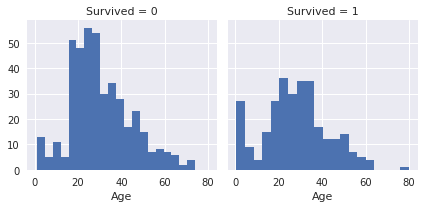

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

* Infants (<4) had a high survival rate
* Oldest passengers (80) survived
* Large number of 15-25 didn't survive

Age should be used as a feature. It should also be completed for missing values. It will also be better to band into age groups.

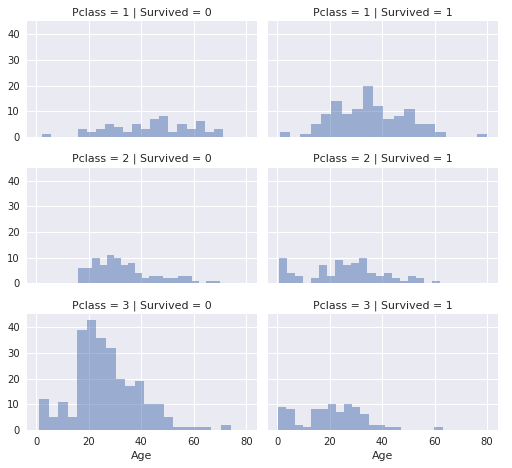

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

* Pclass 3 had the most passengers and the majority did not survive.
* Infants in Pclass 2 and 3 mostly survived
* Most passengers from Pclass 1 survived
* Pclass varies in terms of Age distribution
* Pclass should be in the model

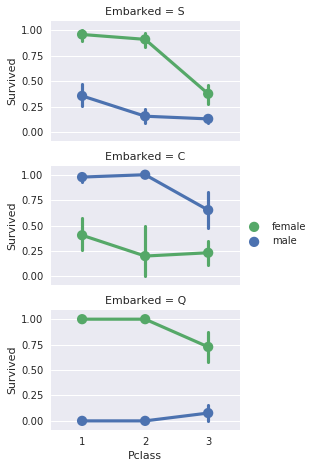

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

* Females have better survival rate than males
* Exception in Embark=C for males having higher survival. Could be a correlation between Pclass and Embark
* Use Sex in model
* Complete Embark feature for model. Maybe combine with another

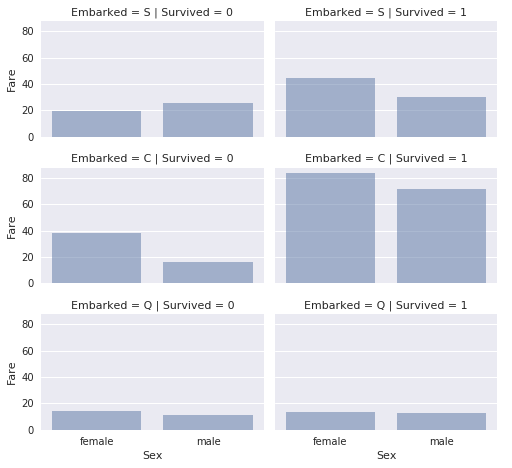

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* Higher Fare correlates with survival.
* Port of embarkation correlates with survival
* Fare might be better in bands

# Cleaning up data
## Dropping features
Cabin and Ticket will be dropped from both training and testing data.

In [18]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 12), (418, 11), (891, 12), (418, 11))


('After', (891, 10), (418, 9), (891, 10), (418, 9))

# Logistic Regression
Having spent some time learning more about how logistic regression works through Andrew Ng's Coursera course, I'd like to try putting it into practice on a real dataset. This could be useful here as this is a classification problem where the result is binary: surived or did not survive. By doing this, I will learn how to implement a logistic regression using a common Python library, feature development, and regularization to prevent overfitting the data.

## Scikit-learn for Logistic Regression
A popular module for Python is scikit-learn which contains the framework for performing a logistic regression. Information about it can be found http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

It was recommended in the course to scale features, at least in linear regression, to help gradient descent converge quicker. In this case, I'll likely want to create dummy variables for Sex, Age, Fare, and Embarked. Age and Fare will first need to be broken down into bins. I'm also going to drop the Name feature for the time being.

Age will be broken down into 5 groups: (0-16) as 0, (17-32) as 1, (33-48) as 2, (49-64) as 3, and (65+) as 4. This will be called Age_Group.

Fare will be split into 5 groups as well based on the percentiles shown above: 0 for 0-20% [$0.00, $7.8542], 1 for ($7.8542, $10.50], 2 for ($10.50, $21.6792], 3 for ($21.6792, $39.605], 4 for ($39.605, inf]. This will be called Fare_Group

In [36]:
train_name_df = train_df['Name']
train_df = train_df.drop(['Name'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [38]:
test_name_df = test_df['Name']
test_df = test_df.drop(['Name'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [42]:
train_df['Age_Group'] = 0
train_df.loc[train_df['Age'] > 16, 'Age_Group'] = 1
train_df.loc[train_df['Age'] > 32, 'Age_Group'] = 2
train_df.loc[train_df['Age'] > 48, 'Age_Group'] = 3
train_df.loc[train_df['Age'] > 64, 'Age_Group'] = 4
train_age_df = train_df['Age']
train_df = train_df.drop(['Age'], axis=1)
train_df.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Group
0,1,0,3,male,1,0,7.2500,S,1
1,2,1,1,female,1,0,71.2833,C,2
2,3,1,3,female,0,0,7.9250,S,1
3,4,1,1,female,1,0,53.1000,S,2
4,5,0,3,male,0,0,8.0500,S,2


In [43]:
test_df['Age_Group'] = 0
test_df.loc[test_df['Age'] > 16, 'Age_Group'] = 1
test_df.loc[test_df['Age'] > 32, 'Age_Group'] = 2
test_df.loc[test_df['Age'] > 48, 'Age_Group'] = 3
test_df.loc[test_df['Age'] > 64, 'Age_Group'] = 4
test_age_df = test_df['Age']
test_df = test_df.drop(['Age'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Group
0,892,3,male,0,0,7.8292,Q,2
1,893,3,female,1,0,7.0000,S,2
2,894,2,male,0,0,9.6875,Q,3
3,895,3,male,0,0,8.6625,S,1
4,896,3,female,1,1,12.2875,S,1


In [45]:
train_df['Fare_Group'] = 0
train_df.loc[train_df['Fare'] > 7.8542, 'Fare_Group'] = 1
train_df.loc[train_df['Fare'] > 10.50, 'Fare_Group'] = 2
train_df.loc[train_df['Fare'] > 21.6792, 'Fare_Group'] = 3
train_df.loc[train_df['Fare'] > 39.605, 'Fare_Group'] = 4
train_fare_df = train_df['Fare']
train_df = train_df.drop(['Fare'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Group
0,1,0,3,male,1,0,S,1,0
1,2,1,1,female,1,0,C,2,4
2,3,1,3,female,0,0,S,1,1
3,4,1,1,female,1,0,S,2,4
4,5,0,3,male,0,0,S,2,1


In [46]:
test_df['Fare_Group'] = 0
test_df.loc[test_df['Fare'] > 7.8542, 'Fare_Group'] = 1
test_df.loc[test_df['Fare'] > 10.50, 'Fare_Group'] = 2
test_df.loc[test_df['Fare'] > 21.6792, 'Fare_Group'] = 3
test_df.loc[test_df['Fare'] > 39.605, 'Fare_Group'] = 4
test_fare_df = test_df['Fare']
test_df = test_df.drop(['Fare'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_Group,Fare_Group
0,892,3,male,0,0,Q,2,0
1,893,3,female,1,0,S,2,0
2,894,2,male,0,0,Q,3,1
3,895,3,male,0,0,S,1,1
4,896,3,female,1,1,S,1,2


In [50]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

,PassengerId,Survived,Pclass,SibSp,Parch,Age_Group,Fare_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,1,0,0,1,0,0,1
1,2,1,1,1,0,2,4,1,0,1,0,0
2,3,1,3,0,0,1,1,1,0,0,0,1
3,4,1,1,1,0,2,4,1,0,0,0,1
4,5,0,3,0,0,2,1,0,1,0,0,1


In [51]:
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

In [52]:
test_df.head()

,PassengerId,Pclass,SibSp,Parch,Age_Group,Fare_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0,2,0,0,1,0,1,0
1,893,3,1,0,2,0,1,0,0,0,1
2,894,2,0,0,3,1,0,1,0,1,0
3,895,3,0,0,1,1,0,1,0,0,1
4,896,3,1,1,1,2,1,0,0,0,1


In [56]:
train_passID_df = train_df['PassengerId']
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,SibSp,Parch,Age_Group,Fare_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,1,0,0,1,0,0,1
1,1,1,1,0,2,4,1,0,1,0,0
2,1,3,0,0,1,1,1,0,0,0,1
3,1,1,1,0,2,4,1,0,0,0,1
4,0,3,0,0,2,1,0,1,0,0,1


In [57]:
test_passID_df = test_df['PassengerId']
test_df = test_df.drop(['PassengerId'], axis=1)
test_df.head()

,Pclass,SibSp,Parch,Age_Group,Fare_Group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,2,0,0,1,0,1,0
1,3,1,0,2,0,1,0,0,0,1
2,2,0,0,3,1,0,1,0,1,0
3,3,0,0,1,1,0,1,0,0,1
4,3,1,1,1,2,1,0,0,0,1


## Implementing logistic regression
Now that the features have been prepared, the logistic regression method can be called.

In [78]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit( train_df.drop(['Survived'], axis=1), train_df['Survived'])
predict_array = logistic.predict(train_df.drop(['Survived'], axis=1))
predict_df = pd.DataFrame( data=predict_array, index=train_df.index.values, columns=['Predict_Survived'])
predict_df['Survived'] = train_df['Survived']
predict_df.head(15)
print('Accuracy')
print(logistic.score( train_df.drop(['Survived'], axis=1), train_df['Survived']))
print('Confusion Matrix')
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_df['Survived'], predict_df['Predict_Survived'])
print(confusion_matrix)
tn, fp, fn, tp = confusion_matrix.ravel()
print( (tn, fp, fn, tp))

Accuracy
0.789001122334
Confusion Matrix
[[462  87]
 [101 241]]
(462, 87, 101, 241)


Using this feature selection, I have an accuracy of 78.9% in predicting who survives. The confusion matrix shows that I have 462+241 = 703 correctly predicted and 87+101 = 188 falsely predicted.

There were 462 true negatives, 87 false positives, 101 false negatives, and 241 true positives.

## Questions about the regression
There could be a dependence on where I place my bounds for both the age and fare groups. It might be wiser to increase the number of dummy variables to have a finer selection. Fare might not be a good predictor or redundant predictor as it might be associated with Pclass.

It might also be better to combine the SibSp and Parch categories into one family feature. Or this might be irrelevant. I could create a feature called Is_Alone.

It might also be good to revisit the Name feature and extract titles as that could impact survival chances.

In [79]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logistic.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Sex_female,1.727868
7,Embarked_C,0.392696
4,Fare_Group,0.297921
8,Embarked_Q,0.210513
9,Embarked_S,0.016759
2,Parch,-0.136898
3,Age_Group,-0.323571
1,SibSp,-0.384645
0,Pclass,-0.681564
6,Sex_male,-0.914172
